In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_features=10, 
    n_samples=1000, 
    n_informative=4,
    n_redundant=6,
    n_repeated=0,
    n_classes=2, 
    random_state=42
)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [11]:
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.66      0.69      0.67       122
           1       0.69      0.66      0.68       128

    accuracy                           0.68       250
   macro avg       0.68      0.68      0.68       250
weighted avg       0.68      0.68      0.68       250



In [12]:
y_pred

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1])

In [13]:
p = model.predict_proba(X_test)[:,1]

y_pred = (p > 0.4).astype(int)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.57      0.65       122
           1       0.67      0.82      0.74       128

    accuracy                           0.70       250
   macro avg       0.71      0.70      0.69       250
weighted avg       0.71      0.70      0.70       250



In [22]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, p)

In [25]:
tpr

array([0.       , 0.0078125, 0.265625 , 0.265625 , 0.2890625, 0.2890625,
       0.296875 , 0.296875 , 0.34375  , 0.34375  , 0.3515625, 0.3515625,
       0.375    , 0.375    , 0.3984375, 0.3984375, 0.4296875, 0.4296875,
       0.4375   , 0.4375   , 0.4609375, 0.4609375, 0.46875  , 0.46875  ,
       0.4765625, 0.4765625, 0.484375 , 0.484375 , 0.4921875, 0.4921875,
       0.5078125, 0.5078125, 0.515625 , 0.515625 , 0.5390625, 0.5390625,
       0.5546875, 0.5546875, 0.5859375, 0.5859375, 0.625    , 0.625    ,
       0.640625 , 0.640625 , 0.6484375, 0.6484375, 0.65625  , 0.65625  ,
       0.71875  , 0.71875  , 0.75     , 0.75     , 0.7578125, 0.7578125,
       0.765625 , 0.765625 , 0.7734375, 0.7734375, 0.7890625, 0.7890625,
       0.796875 , 0.796875 , 0.84375  , 0.84375  , 0.8515625, 0.8515625,
       0.859375 , 0.859375 , 0.8671875, 0.8671875, 0.875    , 0.875    ,
       0.8828125, 0.8828125, 0.890625 , 0.890625 , 0.90625  , 0.90625  ,
       0.9140625, 0.9140625, 0.921875 , 0.921875 , 

In [41]:
desired_recall = 0.8

np.argmin(abs(tpr - desired_recall))

np.int64(60)

In [44]:
thresholds[60], fpr[60]

(np.float64(0.42366894057938426), np.float64(0.4180327868852459))

In [43]:
y_pred = (p > 0.26349585272229664).astype(int)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.73      0.30      0.42       122
           1       0.57      0.90      0.70       128

    accuracy                           0.60       250
   macro avg       0.65      0.60      0.56       250
weighted avg       0.65      0.60      0.56       250



In [32]:
from sklearn.metrics import auc

area = auc(fpr, tpr)
area

np.float64(0.764856557377049)

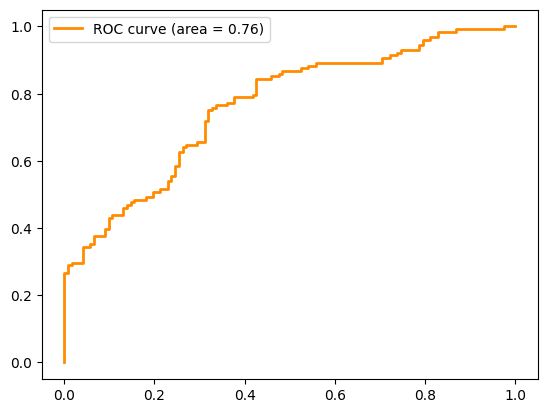

In [40]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % area)
plt.legend()
plt.show()